In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_log_error
import sklearn
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from regressors import stats

# EDA

In [2]:
df = pd.read_csv('./Housing Dreams/house_train_raw.csv')

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('El dataframe tiene', df.shape[0], 'registros y', df.shape[1], 'columnas')

El dataframe tiene 1460 registros y 81 columnas


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Cuenta de nulos

In [6]:
pd.options.display.max_rows = None
cuenta_nulos = df.isna().sum()
cuenta_nulos[cuenta_nulos != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Porcentaje de valores nulos

In [8]:
porcentaje_nulos = df.isnull().sum()/len(df)*100
porcentaje_nulos[porcentaje_nulos != 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

# Elimino columnas con mayor cantidad de nulos

In [9]:
df = df.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu','Alley', 'LotFrontage'])

In [10]:
cuenta_nulos = df.isna().sum()
cuenta_nulos[cuenta_nulos != 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
pd.reset_option('max_rows')

## Separo features cuantitativas y cualitativas

In [12]:
cuantitativas = [i for i in df.drop(columns= ['SalePrice']).columns if df.dtypes[i] != 'object']

In [13]:
cualitativas = [i for i in df.columns if df.dtypes[i] == 'object']

## Verifico la correlacion entre las variables

In [14]:
df.corr()['SalePrice'].sort_values(ascending = False).head(25)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
Name: SalePrice, dtype: float64

## Filtro las variables con alta correlacion

In [15]:
alta_corr = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

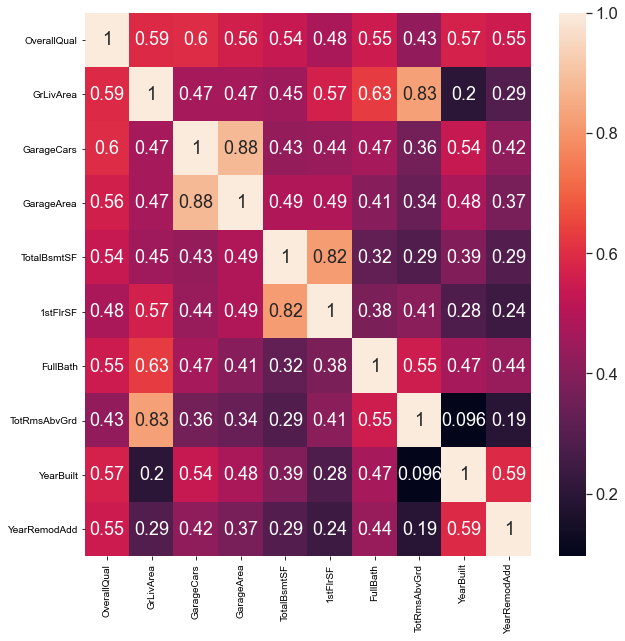

In [16]:
cor_m = np.corrcoef(df[alta_corr].values.T)
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale = 1.5)
sns.heatmap(cor_m, cbar=True, annot = True, yticklabels = alta_corr, xticklabels = alta_corr);

## Me quedo con las de mayor correlacion y hago un dataframe con ellas

In [17]:
df = pd.concat([df[alta_corr], df[['SalePrice']]])

# Imputación de valores nulos

In [18]:
SI = SimpleImputer()
X = SI.fit_transform(df.drop(columns = ['SalePrice']))

In [19]:
SI = SimpleImputer()
y = SI.fit_transform(df[['SalePrice']])

# Divido datos de entrenamiento y de prueba

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Decidí usar modelos de regresion en base a los siguientes criterios:

## 1-Tengo que predecir sobre una variable númerica

## 2-Las variables independientes que me sirven son principalmente numericas

## -----------------------------------------------------------


# Modelo de Regresion lineal

## Se instancia el modelo

In [21]:
model = LinearRegression()

## Se entrena

In [22]:
model.fit(X_train, y_train)

LinearRegression()

## Se saca la prediccion

In [23]:
predict_y = model.predict(X_test)

### rmsle

In [24]:
rmsle = mean_squared_log_error(y_test, predict_y, squared = False)
rmsle

0.2568102465667464

# ElasticNet

In [25]:
EN = ElasticNet()
EN.fit(X_train, y_train)

ElasticNet()

In [26]:
predict_y = EN.predict(X_test)

In [27]:
rmsle = mean_squared_log_error(y_test, predict_y, squared = False)
rmsle

0.25681021944378285

In [28]:
print(EN.score(X_test, y_test))

-0.00034730142654226803


# Random Forest Regresor

In [29]:

rfr = RandomForestRegressor(n_estimators = 130, random_state = 25)
rfr.fit(X_train, y_train)
predict_y = rfr.predict(X_test)


<ipython-input-29-bc832cebda09>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


In [30]:
rmsle = mean_squared_log_error(y_test, predict_y, squared = False)
rmsle

0.2570299416226971

In [31]:
pred_final = pd.Series(predict_y)
pred_final.to_csv("pred_test.csv")

### El mejor Score lo obtuve con el Random Forest Regresor, para subir el score planeo verificar el p value de las features que estoy utilizando. No lo he hecho y ya se me agoto el tiempo :(